In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SalaryData.csv")

In [3]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
int(df["Gender"].isna().sum())

2

In [8]:
df[df["Gender"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(index=172,inplace=True)

In [10]:
df.drop(index=260,inplace=True)

In [11]:
df[df["Gender"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [12]:
df["Gender"] = pd.get_dummies(df["Gender"],drop_first=True)

In [13]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,True,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,False,Master's,Data Analyst,3.0,65000.0
2,45.0,True,PhD,Senior Manager,15.0,150000.0
3,36.0,False,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,True,Master's,Director,20.0,200000.0


In [14]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [15]:
int(df["Education Level"].isna().sum())

0

In [16]:
df[df["Education Level"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [17]:
df = pd.get_dummies(df,columns=["Education Level"],drop_first=True)


In [18]:
df.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD
0,32.0,True,Software Engineer,5.0,90000.0,False,False
1,28.0,False,Data Analyst,3.0,65000.0,True,False
2,45.0,True,Senior Manager,15.0,150000.0,False,True
3,36.0,False,Sales Associate,7.0,60000.0,False,False
4,52.0,True,Director,20.0,200000.0,True,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       373 non-null    float64
 1   Gender                    373 non-null    bool   
 2   Job Title                 373 non-null    object 
 3   Years of Experience       373 non-null    float64
 4   Salary                    373 non-null    float64
 5   Education Level_Master's  373 non-null    bool   
 6   Education Level_PhD       373 non-null    bool   
dtypes: bool(3), float64(3), object(1)
memory usage: 15.7+ KB


In [20]:
len(df["Job Title"].unique())

174

In [21]:
df["Job Title_encoded"] = df.groupby("Job Title")["Salary"].transform("mean")

In [22]:
df.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD,Job Title_encoded
0,32.0,True,Software Engineer,5.0,90000.0,False,False,90000.0
1,28.0,False,Data Analyst,3.0,65000.0,True,False,72500.0
2,45.0,True,Senior Manager,15.0,150000.0,False,True,160000.0
3,36.0,False,Sales Associate,7.0,60000.0,False,False,50000.0
4,52.0,True,Director,20.0,200000.0,True,False,200000.0


In [23]:
df.drop("Job Title",inplace=True,axis=1)

In [24]:
df.head()

,Age,Gender,Years of Experience,Salary,Education Level_Master's,Education Level_PhD,Job Title_encoded
0,32.0,True,5.0,90000.0,False,False,90000.0
1,28.0,False,3.0,65000.0,True,False,72500.0
2,45.0,True,15.0,150000.0,False,True,160000.0
3,36.0,False,7.0,60000.0,False,False,50000.0
4,52.0,True,20.0,200000.0,True,False,200000.0


In [25]:
y = df["Salary"]
X = df.drop(["Salary"],axis=1)

In [26]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [27]:
X

,Age,Gender,Years of Experience,Education Level_Master's,Education Level_PhD,Job Title_encoded
0,32.0,True,5.0,False,False,90000.000000
1,28.0,False,3.0,True,False,72500.000000
2,45.0,True,15.0,False,True,160000.000000
3,36.0,False,7.0,False,False,50000.000000
4,52.0,True,20.0,True,False,200000.000000
...,...,...,...,...,...,...
370,35.0,False,8.0,False,False,89444.444444
371,43.0,True,19.0,True,False,172727.272727
372,29.0,False,2.0,False,False,47000.000000
373,34.0,True,7.0,False,False,97500.000000


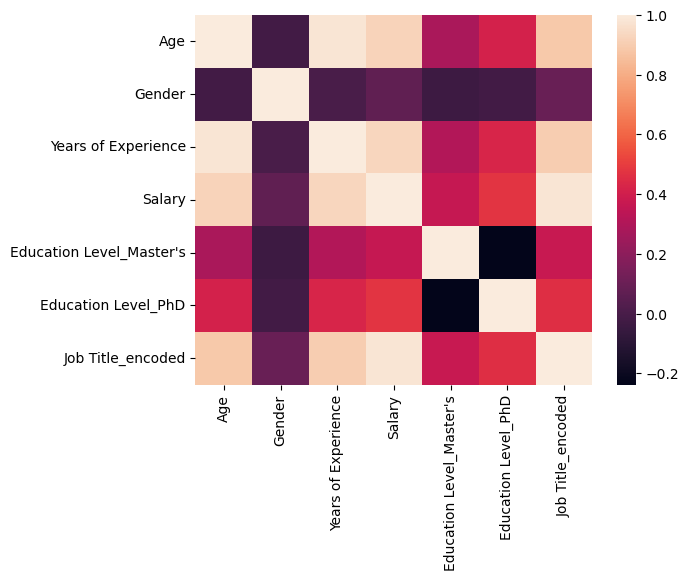

In [33]:
sns.heatmap(df.corr())
plt.show()

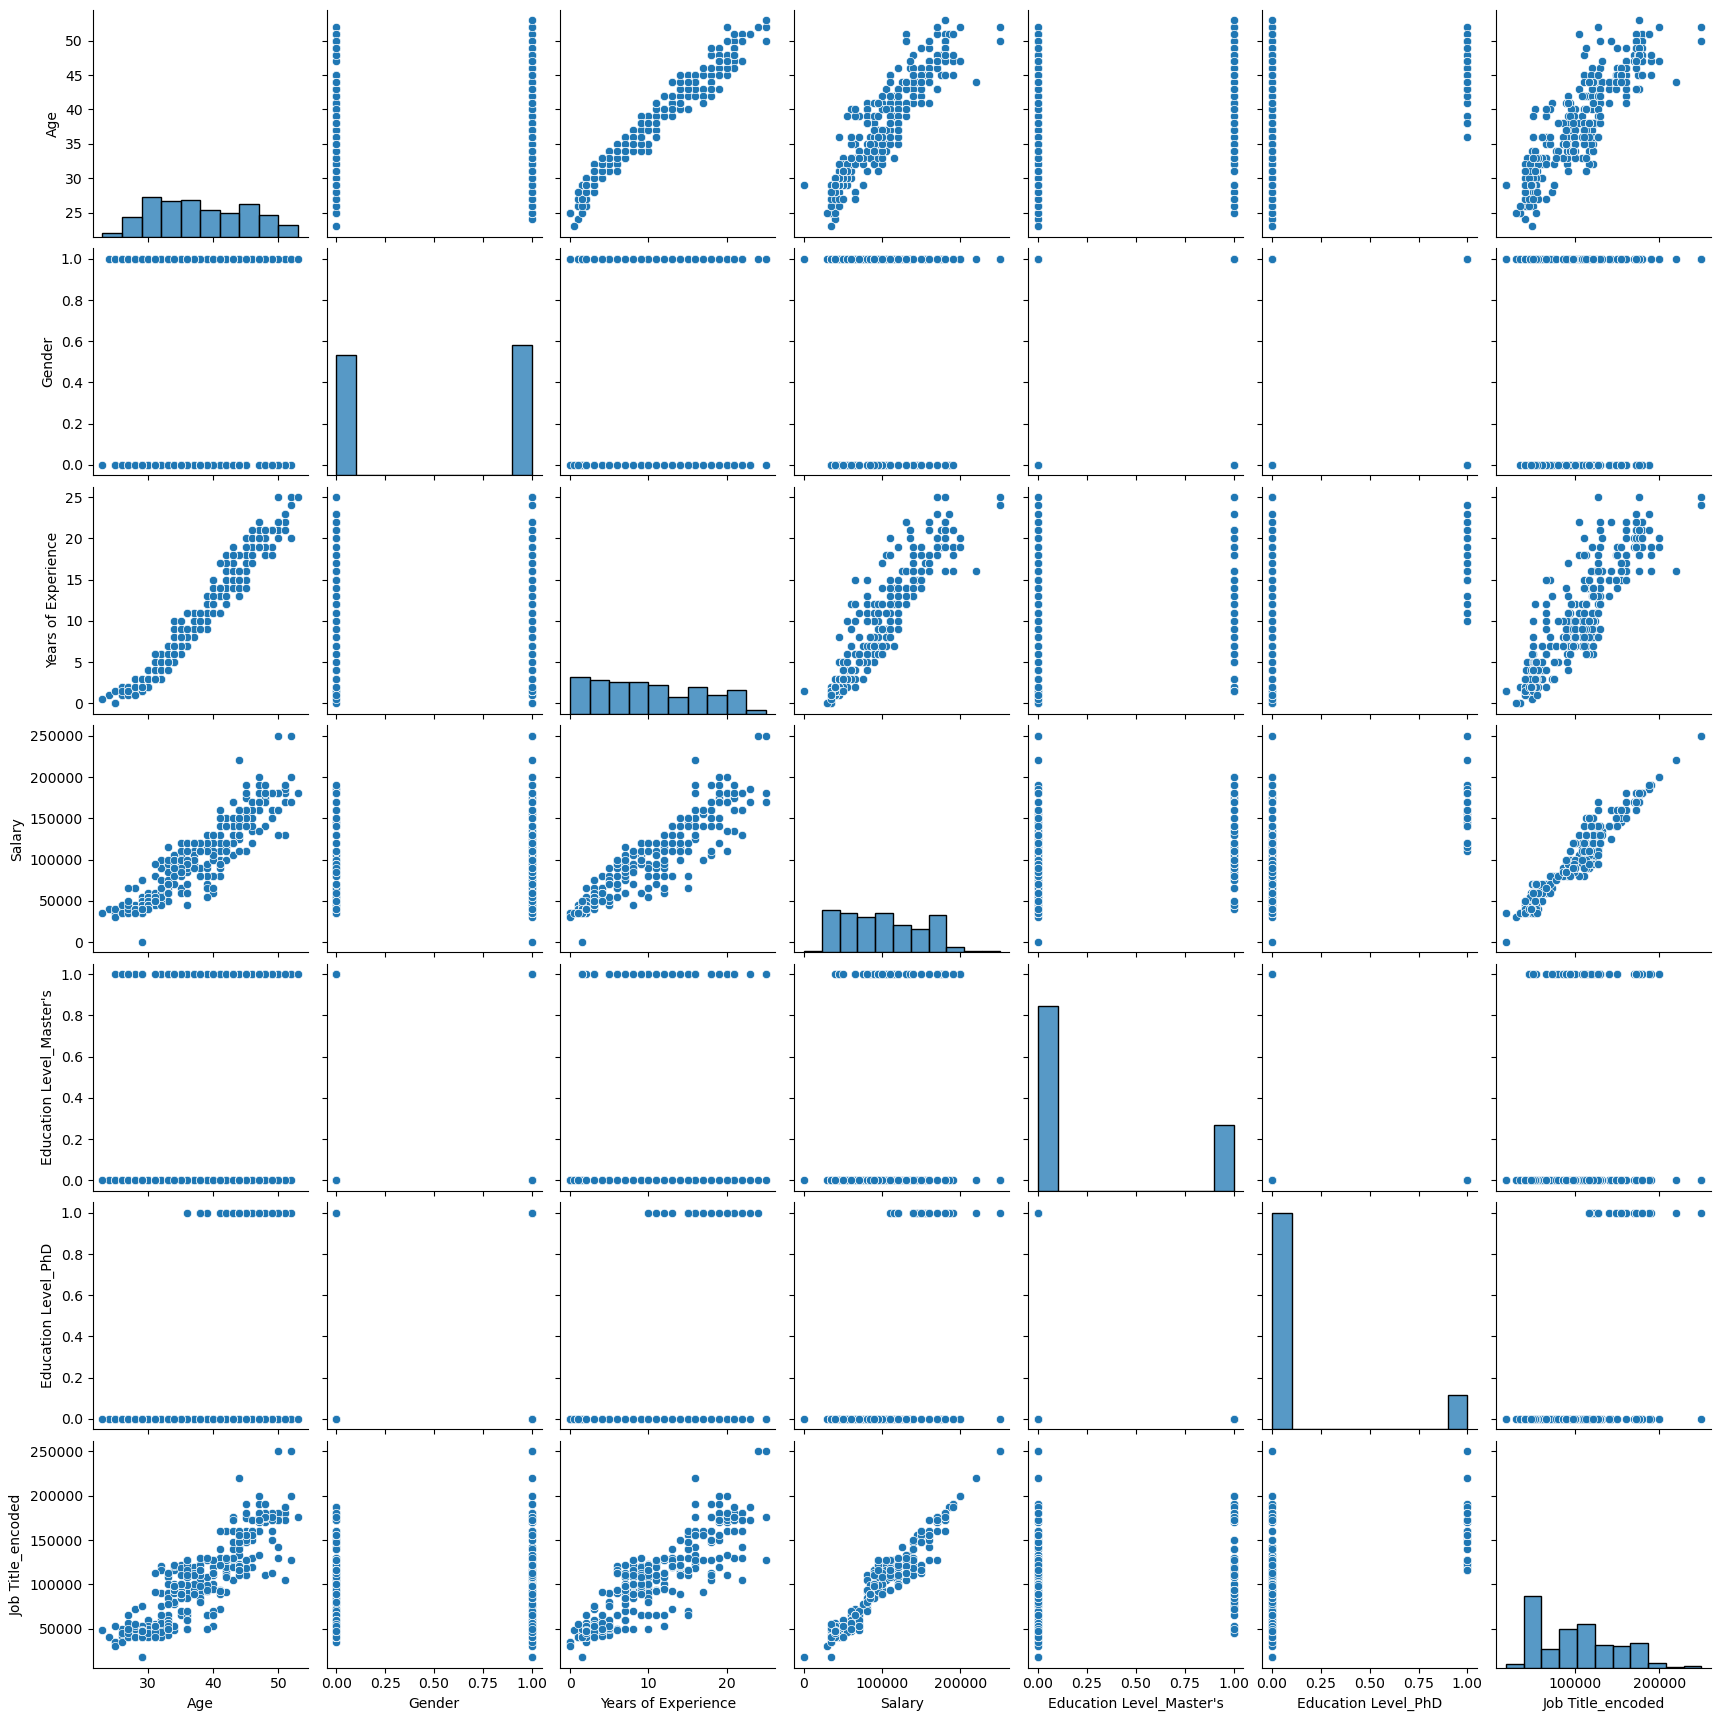

In [34]:
sns.pairplot(df)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_test , X_train , y_test , y_train = train_test_split(X,y,test_size=0.20,random_state=15) 

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae: 6408.360679600369
mse: 72959149.41901748
score: 0.9670985388473257


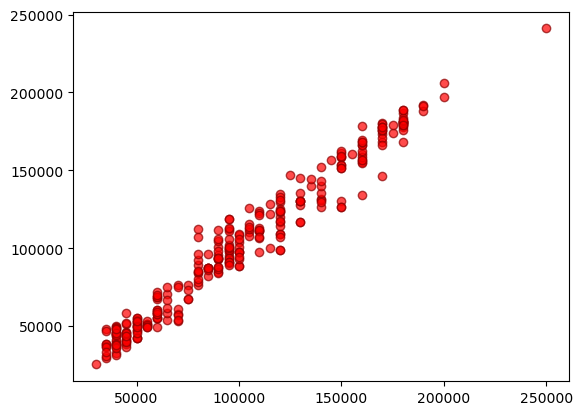

In [38]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

mae: 6406.343372544233
mse: 72931684.04757442
score: 0.9671109245571204


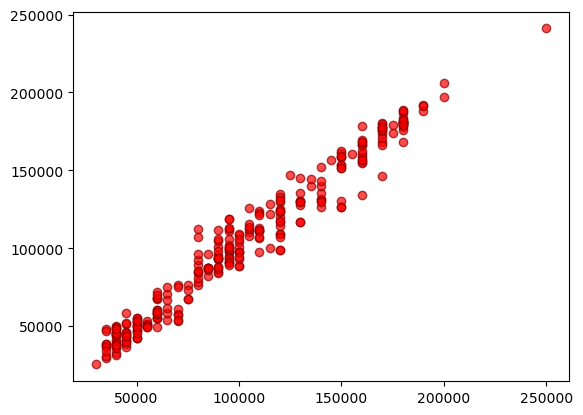

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

mae: 6305.862242751141
mse: 70251776.68579152
score: 0.9683194483496619


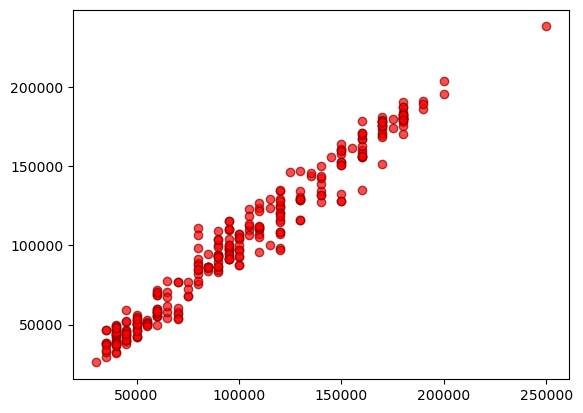

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)


plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

mae: 8044.460740823733
mse: 109177058.56804726
score: 0.9507658082660768


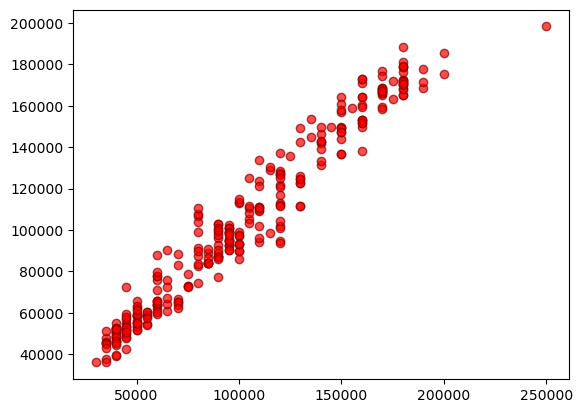

In [41]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)


plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()